In [1]:
# Sales & Expense Overview
# This project analyzes business sales data from Excel.
# It shows total revenue, fees, net profit, top products, and a fee breakdown with visualizations.

import pandas as pd
import matplotlib.pyplot as plt

# Load dataset (make sure Blingitdataset.xlsx is in the same folder as this notebook)
df = pd.read_excel("/content/Blingitdataset.xlsx", sheet_name="Income Overview")

# Preview first few rows
df.head()


/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Statement Period,Statement Number,Transaction Date,Fee Name,Amount(Include Tax),VAT Amount,Release Status,Release Date,Comment,Order Creation Date,Order Number,Order Line ID,Seller SKU,Lazada SKU,WHT Amount,WHT included in Amount,Order Status,Product Name
0,22 Sep 2025 - 28 Sep 2025,LKFJ4H975P-2025-039,28 Sep 2025,Handling Fee,-17.70,2.7000,Ready to Release,NaN,NaN,26 Sep 2025,2.215500e+14,2.215500e+14,615866923-1757840034753-0,615866923_LK-2800216336,0,NO,Delivered,✨ Luxury Soft Textured Scrunchies
1,22 Sep 2025 - 28 Sep 2025,LKFJ4H975P-2025-039,28 Sep 2025,Commission Fee,-141.16,21.5334,Ready to Release,NaN,NaN,26 Sep 2025,2.215500e+14,2.215500e+14,615866923-1757840034753-0,615866923_LK-2800216336,0,NO,Delivered,✨ Luxury Soft Textured Scrunchies
2,22 Sep 2025 - 28 Sep 2025,LKFJ4H975P-2025-039,28 Sep 2025,Shipping Fee,-286.02,43.6302,Ready to Release,NaN,NaN,26 Sep 2025,2.215500e+14,2.215500e+14,615866923-1757840034753-0,615866923_LK-2800216336,0,NO,Delivered,✨ Luxury Soft Textured Scrunchies
3,22 Sep 2025 - 28 Sep 2025,LKFJ4H975P-2025-039,28 Sep 2025,Payment Fee,-24.78,3.7800,Ready to Release,NaN,NaN,26 Sep 2025,2.215500e+14,2.215500e+14,615866923-1757840034753-0,615866923_LK-2800216336,0,NO,Delivered,✨ Luxury Soft Textured Scrunchies
4,22 Sep 2025 - 28 Sep 2025,LKFJ4H975P-2025-039,28 Sep 2025,Shipping Fee Paid by Buyer,286.00,0.0000,Ready to Release,NaN,NaN,26 Sep 2025,2.215500e+14,2.215500e+14,615866923-1757840034753-0,615866923_LK-2800216336,0,NO,Delivered,✨ Luxury Soft Textured Scrunchies


In [2]:
# Ensure numeric conversion for amount columns
df["Amount(Include Tax)"] = pd.to_numeric(df["Amount(Include Tax)"], errors="coerce")
df["VAT Amount"] = pd.to_numeric(df["VAT Amount"], errors="coerce")

# Check missing values
df.isnull().sum()


,0
Statement Period,0
Statement Number,0
Transaction Date,0
Fee Name,0
Amount(Include Tax),0
VAT Amount,0
Release Status,0
Release Date,23
Comment,74
Order Creation Date,5


In [3]:
# Total revenue, fees, and profit
total_revenue = df.loc[df["Amount(Include Tax)"] > 0, "Amount(Include Tax)"].sum()
total_fees = df.loc[df["Amount(Include Tax)"] < 0, "Amount(Include Tax)"].sum()
net_profit = total_revenue + total_fees

print("Total Revenue:", total_revenue)
print("Total Fees:", total_fees)
print("Net Profit:", net_profit)


Total Revenue: 5358.0
Total Fees: -3636.91
Net Profit: 1721.0900000000001


In [4]:
top_products = (
    df[df["Amount(Include Tax)"] > 0]
    .groupby("Product Name")["Amount(Include Tax)"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)
top_products


,Amount(Include Tax)
Product Name,
Hair Clip - Lemon Cream – Soft yellow colour,2221.0
✨ Luxury Soft Textured Scrunchies,986.0
Hair clip Rose Splash – Vibrant pink,634.0
Araliya flower clip white,510.0
Araliya flower clip pink,460.0


In [5]:
fee_breakdown = (
    df[df["Amount(Include Tax)"] < 0]
    .groupby("Fee Name")["Amount(Include Tax)"]
    .sum()
    .sort_values()
)
fee_breakdown


,Amount(Include Tax)
Fee Name,
Shipping Fee,-2705.13
Commission Fee,-586.51
Handling Fee,-212.40
Payment Fee,-93.93
Daraz Coins Discount Participation Fee,-38.94


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


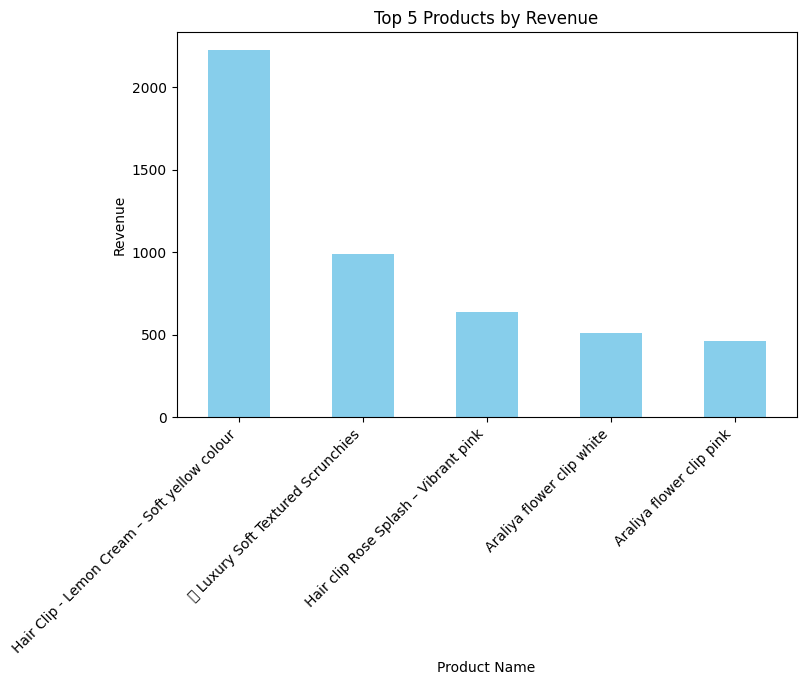

In [7]:
# Top products bar chart
plt.figure(figsize=(8,5))
top_products.plot(kind="bar", color="skyblue")
plt.title("Top 5 Products by Revenue")
plt.ylabel("Revenue")
plt.xticks(rotation=45, ha="right")
plt.show()



Conclusion
- This analysis provides insights into revenue, fees, and profit.
- Top-selling products and major expenses are highlighted.
- Next step: Expand into sales trends over time or build a Power BI dashboard.
